In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
boxscore = pd.read_csv("2012-18_officialBoxScore.csv")

plyboxscore = pd.read_csv("2012-18_playerBoxScore.csv")

tmboxscore = pd.read_csv("2012-18_teamBoxScore.csv")

college = pd.read_csv("college.csv",index_col=0)
standings = pd.read_csv("2012-18_standings.csv")

college = college.fillna(0)

college_by_team = college.groupby(["college"]).mean()

In [19]:
college_and_name = college.groupby(["college", "name"]).mean()
college_and_name

active_from  active_to  \
college                     name                                            
0                           Al Cervi                    1950.0     1953.0   
                            Al Harrington               1999.0     2014.0   
                            Al Jefferson                2005.0     2018.0   
                            Aleksandar Djordjevic       1997.0     1997.0   
                            Alex Abrines                2017.0     2018.0   
...                                                        ...        ...   
Yale University             Butch Graves                1985.0     1985.0   
                            Chris Dudley                1988.0     2003.0   
                            Tony Lavelli                1950.0     1951.0   
Yankton College             Chuck Lloyd                 1971.0     1971.0   
Youngstown State University Leo Mogus                   1947.0     1951.0   

                                                   weight  NBA__3ptapg  \
college                     name                                         
0                           Al Cervi                170.0          0.0   
                            Al Harrington           230.0          2.8   
                            Al Jefferson            289.0          0.1   
                            Aleksandar Djordjevic   198.0          0.9   
                            Alex Abrines            190.0          3.3   
...                                                   ...          ...   
Yale University             Butch Graves            200.0          0.3   
                            Chris Dudley            235.0          0.0   
                            Tony Lavelli            185.0          0.0   
Yankton College             Chuck Lloyd             220.0          0.0   
Youngstown State University Leo Mogus               190.0          0.0   

                                                   NBA__3ptpct  NBA__3ptpg  \
college                     name                                             
0                           Al Cervi                     0.000         0.0   
                            Al Harrington                0.352         1.0   
                            Al Jefferson                 0.123         0.0   
                            Aleksandar Djordjevic        0.714         0.6   
                            Alex Abrines                 0.379         1.2   
...                                                        ...         ...   
Yale University             Butch Graves                 0.000         0.0   
                            Chris Dudley                 0.000         0.0   
                            Tony Lavelli                 0.000         0.0   
Yankton College             Chuck Lloyd                  0.000         0.0   
Youngstown State University Leo Mogus                    0.000         0.0   

                                                   NBA_efgpct  NBA_fg%  \
college                     name                                         
0                           Al Cervi                    0.000    0.359   
                            Al Harrington               0.487    0.444   
                            Al Jefferson                0.499    0.499   
                            Aleksandar Djordjevic       0.656    0.500   
                            Alex Abrines                0.533    0.393   
...                                                       ...      ...   
Yale University             Butch Graves                0.333    0.333   
                            Chris Dudley                0.412    0.412   
                            Tony Lavelli                0.000    0.367   
Yankton College             Chuck Lloyd                 0.451    0.451   
Youngstown State University Leo Mogus                   0.000    0.332   

                                                   NBA_fg_per_game  \
college                     name      

In [20]:
college_counts = college.groupby('college').count()[['name']].rename(columns={'name':'count'})
college_by_team['counts'] = college_counts['count']
college_by_team[college_by_team['counts']>3].sort_values(by=['NBA__3ptpct'], ascending = False)

,active_from,active_to,weight,NBA__3ptapg,NBA__3ptpct,NBA__3ptpg,NBA_efgpct,NBA_fg%,NBA_fg_per_game,NBA_fga_per_game,...,NCAA_efgpct,NCAA_fgapg,NCAA_fgpct,NCAA_fgpg,NCAA_ft,NCAA_ftapg,NCAA_ftpg,NCAA_games,NCAA_ppg,counts
college,,,,,,,,,,,,,,,,,,,,,
University of North Texas,1978.800000,1981.000000,196.600000,0.620000,0.298800,0.180000,0.346400,0.424000,2.160000,5.180000,...,0.0,1.920000,0.098000,0.940000,0.140400,0.980000,0.700000,11.000000,2.740000,5
University of Louisiana at Lafayette,1986.625000,1988.625000,199.000000,0.787500,0.278125,0.250000,0.455750,0.441875,3.450000,7.612500,...,0.0,2.887500,0.123500,1.437500,0.160875,1.475000,0.937500,29.375000,3.950000,8
"University of Nevada, Reno",2000.900000,2005.600000,222.200000,0.670000,0.271700,0.230000,0.496600,0.469200,2.250000,4.800000,...,0.0,10.840000,0.481100,5.180000,0.716100,4.320000,3.150000,87.000000,14.070000,10
Texas Christian University,1978.166667,1982.000000,207.500000,0.116667,0.262500,0.033333,0.482000,0.492167,1.550000,3.183333,...,0.0,5.466667,0.256500,2.800000,0.350833,2.183333,1.433333,51.666667,7.100000,6
Gonzaga University,2008.642857,2012.285714,223.357143,1.192857,0.260929,0.414286,0.420429,0.365786,1.857143,4.350000,...,0.0,7.685714,0.515786,3.957143,0.735571,3.564286,2.635714,109.000000,11.171429,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Columbia University,1958.000000,1960.600000,210.000000,0.000000,0.000000,0.000000,0.084000,0.406800,3.000000,7.220000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5
Dartmouth College,1965.000000,1967.166667,192.500000,0.000000,0.000000,0.000000,0.171167,0.391000,2.183333,6.033333,...,0.0,2.766667,0.164167,2.233333,0.255500,1.283333,1.466667,33.666667,6.033333,6
University of Maryland Eastern Shore,1968.000000,1968.500000,188.750000,0.000000,0.000000,0.000000,0.000000,0.397250,2.200000,5.925000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4


In [21]:
college_nozero = college[college["college"] != 0 ]
college_nozero = college_nozero.rename(columns={'name':'playDispNm'})
nba_and_college = pd.merge(plyboxscore, college_nozero[["college", 'playDispNm']], how='inner', on='playDispNm')
nba_and_college

,gmDate,gmTime,seasTyp,playLNm,playFNm,teamAbbr,teamConf,teamDiv,teamLoc,teamRslt,...,playORB,playDRB,playTRB,opptAbbr,opptConf,opptDiv,opptLoc,opptRslt,opptDayOff,college
0,2012-10-30,19:00,Regular,Price,A.J.,WAS,East,Southeast,Away,Loss,...,1,1,2,CLE,East,Central,Home,Win,0,University of Connecticut
1,2012-11-03,19:00,Regular,Price,A.J.,WAS,East,Southeast,Home,Loss,...,0,4,4,BOS,East,Atlantic,Away,Win,1,University of Connecticut
2,2012-11-07,19:30,Regular,Price,A.J.,WAS,East,Southeast,Away,Loss,...,0,5,5,BOS,East,Atlantic,Home,Win,4,University of Connecticut
3,2012-11-09,19:00,Regular,Price,A.J.,WAS,East,Southeast,Home,Loss,...,0,6,6,MIL,East,Central,Away,Win,2,University of Connecticut
4,2012-11-10,19:00,Regular,Price,A.J.,WAS,East,Southeast,Away,Loss,...,0,3,3,IND,East,Central,Home,Win,1,University of Connecticut
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122675,2018-04-01,07:00,Regular,Patton,Justin,MIN,West,Northwest,Home,Loss,...,0,0,0,UTA,West,Northwest,Away,Win,1,Creighton University
122676,2018-04-06,08:00,Regular,Johnson,Omari,MEM,West,Southwest,Home,Loss,...,1,1,2,SAC,West,Pacific,Away,Win,2,Oregon State University
122677,2018-04-08,03:30,Regular,Johnson,Omari,MEM,West,Southwest,Home,Win,...,1,1,2,DET,East,Central,Away,Loss,1,Oregon State University
122678,2018-04-09,08:00,Regular,Johnson,Omari,MEM,West,Southwest,Away,Loss,...,2,1,3,MIN,West,Northwest,Home,Win,2,Oregon State University


In [6]:
df_pos = plyboxscore[plyboxscore["playPos"] != "F"] #191 players not PF nor SF, just F
df_pos1 = df_pos[df_pos["playPos"] != "G"] #118 G
# ~300 players dropped because their postion was ... unclear ?

#df_pos["playMin"].isnull().values.any() #False, so we are good

df_pos = df_pos1.groupby("playPos").mean()
df_pos["playMin"]

playPos
C     21.636153
PF    21.501225
PG    24.345864
SF    23.808422
SG    23.161035
Name: playMin, dtype: float64

Here, we can see that on average, Power Forwards and Centers play the least amount of time with 21 Minutes and ~30 seconds. Point Guards play the most amounts of time on average, with 24 Minutes and ~20 seconds.

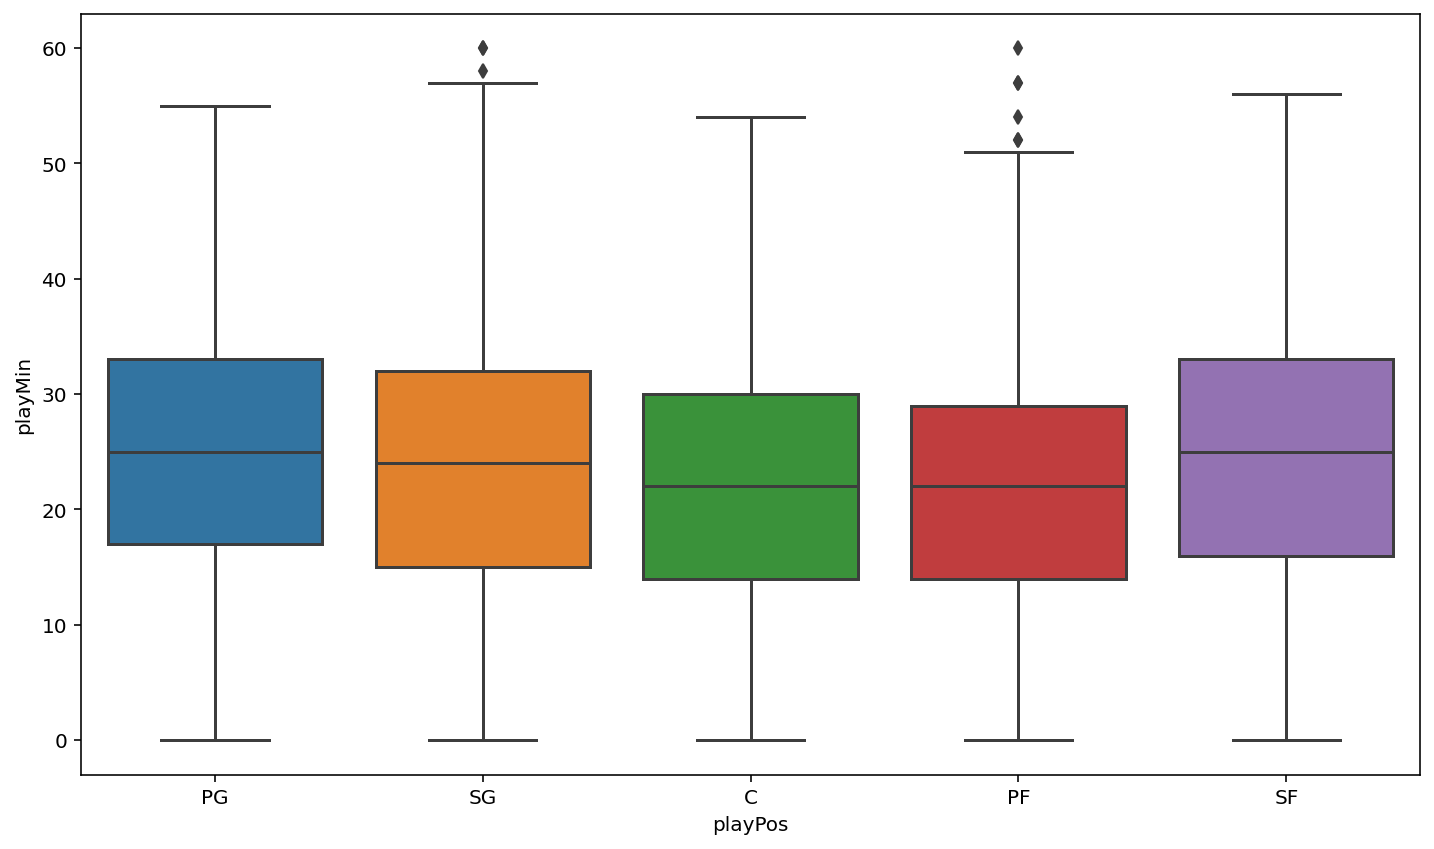

In [23]:
df_pos2 = df_pos1[["playPos", "playMin"]]
sns.boxplot(x="playPos", y="playMin", data=df_pos2);

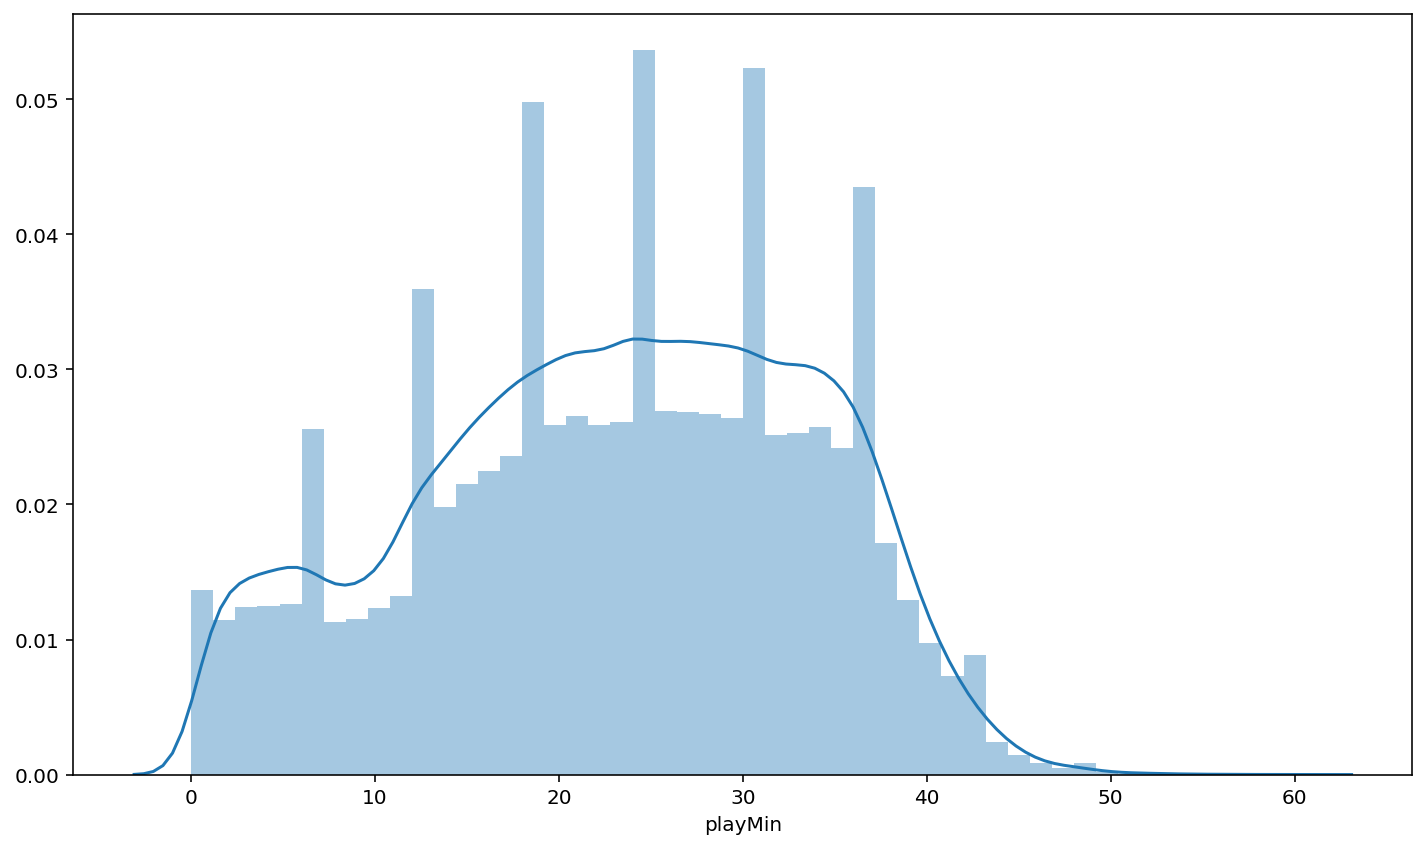

In [24]:
sns.distplot(plyboxscore["playMin"]);

In [25]:
east = plyboxscore[plyboxscore["teamConf"] == "East"]
west = plyboxscore[plyboxscore["teamConf"] == "West"]

east = east[east["playPos"] != "F"]
east = east[east["playPos"] != "G"]

east = east.groupby("playPos").mean()
east["playMin"]

playPos
C     22.245996
PF    20.956774
PG    24.547399
SF    24.145970
SG    23.456484
Name: playMin, dtype: float64

In [26]:
west = west[west["playPos"] != "F"]
west = west[west["playPos"] != "G"]

west = west.groupby("playPos").mean()
west["playMin"]

playPos
C     21.042448
PF    22.057384
PG    24.154227
SF    23.486550
SG    22.852685
Name: playMin, dtype: float64

Here we see different averages in between conferences

In [27]:
df_pf = plyboxscore[plyboxscore["playPos"]=="PF"] #33,466
df_sf = plyboxscore[plyboxscore["playPos"]=="SF"] #29,993
df_pg = plyboxscore[plyboxscore["playPos"]=="PG"] #33,091
df_sg = plyboxscore[plyboxscore["playPos"]=="SG"] #33,794
df_c = plyboxscore[plyboxscore["playPos"]=="C"] #25,060

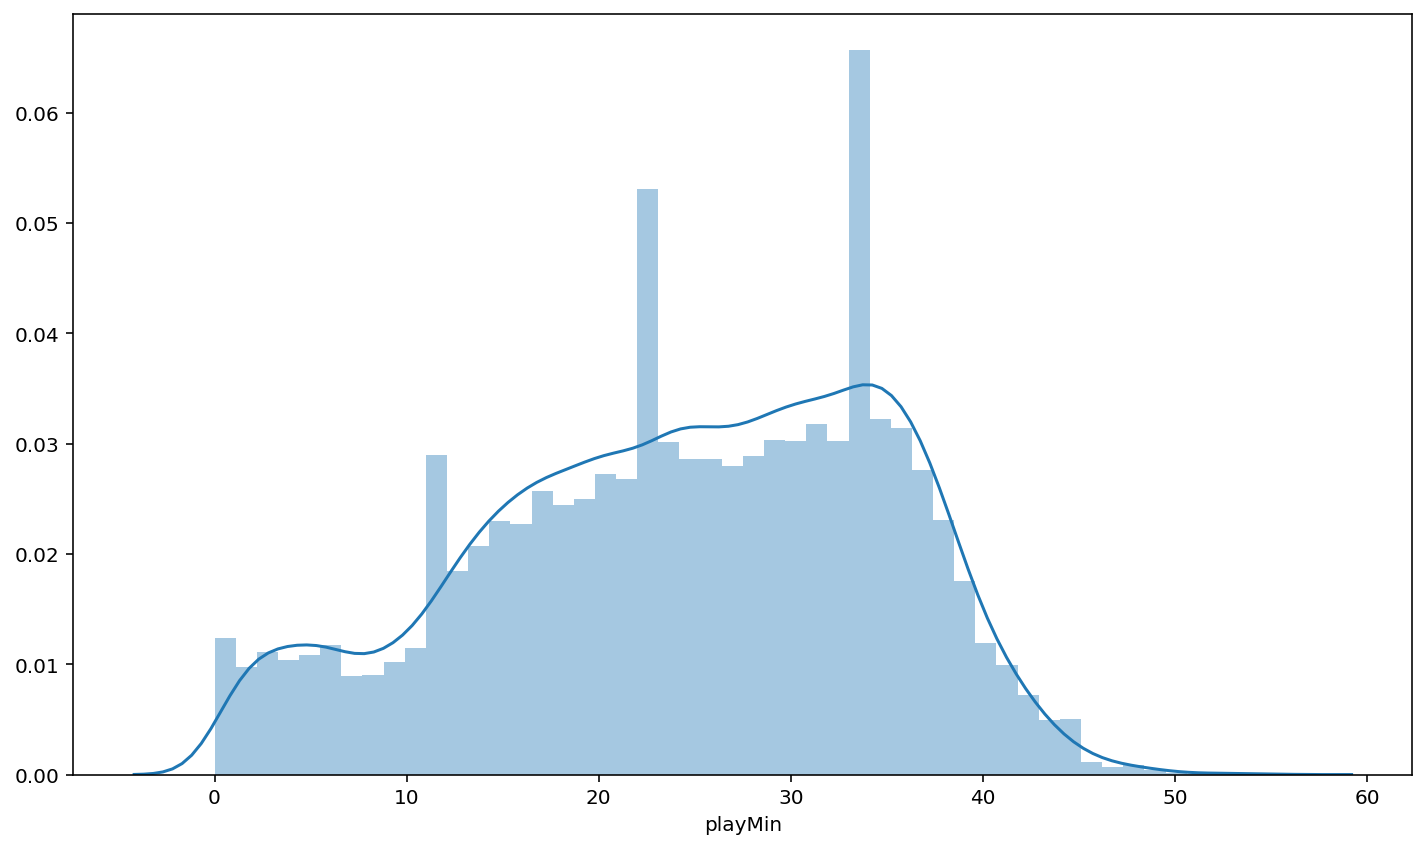

In [38]:
sns.distplot(df_pg["playMin"]);

In [7]:
df = df_pos1

In [8]:
#Recreating Jack's RFC, with some adjustments
#df_pos1 has no F nor G players , df will include more features
df.head(3)

pos_map = {'PG': 1, 'SG': 2, 'C': 3, 'PF': 4, 'SF': 5}
df['playPosLabel'] = df['playPos'].map(pos_map)

conf_map = {'West': 1, 'East': 2}
df['teamConfMap'] = df['teamConf'].map(conf_map)


df = df[["teamConfMap", "playMin", "playPosLabel", "playPTS", "playAST",
         "playTO", "playSTL", "playBLK", "playPF", "playFGA", "playFGM", "playFG%", "play2PA",
         "play2PM", "play2P%", "play3PA", "play3PM", "play3P%", "playFTA", "playFTM", "playFT%",
         "playORB", "playDRB", "playTRB"]]

In [9]:
df.head(5)

,teamConfMap,playMin,playPosLabel,playPTS,playAST,playTO,playSTL,playBLK,playPF,playFGA,...,play2P%,play3PA,play3PM,play3P%,playFTA,playFTM,playFT%,playORB,playDRB,playTRB
0,2,29,1,7,6,1,0,0,1,13,...,0.00,9,2,0.2222,1,1,1.0,1,1,2
1,2,25,2,9,4,0,3,2,0,8,...,0.25,4,2,0.5000,2,1,0.5,1,2,3
2,2,25,3,10,0,1,0,4,1,10,...,0.40,0,0,0.0000,4,2,0.5,5,2,7
3,2,22,2,8,3,2,1,0,1,8,...,0.00,4,2,0.5000,2,2,1.0,0,3,3
4,2,17,4,4,1,4,1,1,4,9,...,0.25,1,0,0.0000,0,0,0.0,1,0,1


In [10]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size = 0.1, random_state=42)

y_train = train.iloc["playPosLabel"]
X_train = train.drop(["playPosLabel"], axis=1)

y_test = test.iloc["playPosLabel"]
X_test = test.drop(["playPosLabel"], axis=1)


TypeError: Cannot index by location index with a non-integer key

In [58]:
from sklearn.ensemble import RandomForestClassifier as RFC

rfc_b = RFC()
model2 = rfc_b.fit(X_train,y_train)

training_accuracy2 = model2.score(X_train, y_train)
print("Training Accuracy: ", training_accuracy2)
test_accuracy2 = model2.score(X_test, y_test)
print("Test Accuracy: ", test_accuracy2)

/usr/local/lib/python3.6/dist-packages/ipykernel/__main__.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
